# [Lab Session 3](fourier.ipynb)


In [92]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


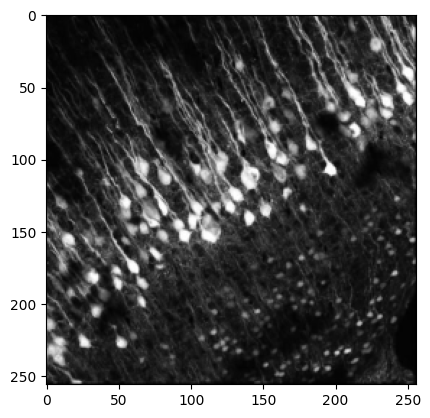

In [93]:
cell_img = plt.imread('data/cells.png')
plt.imshow(cell_img)
cell_img = resize(cell_img, (256,256))
plt.imshow(cell_img, cmap='gray')


**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [94]:
cell_ft = np.fft.fft2(cell_img)
print(cell_ft.dtype)

complex128


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [95]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

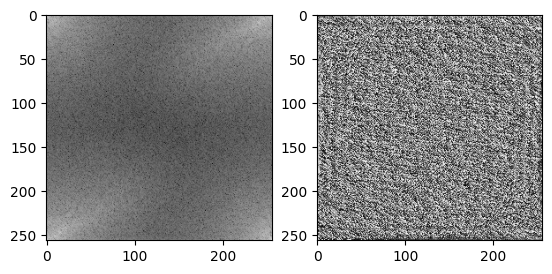

In [96]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


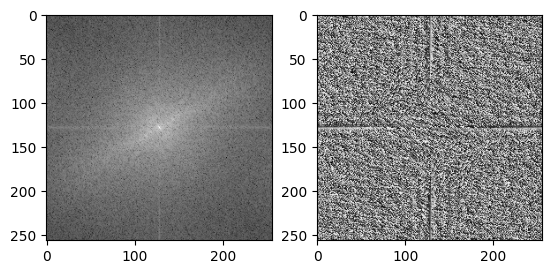

In [97]:
cell_ft0 = np.fft.fftshift(cell_ft)
amplitudecsh = np.abs(cell_ft0)
phasecsh = np.angle(cell_ft0)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitudecsh), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phasecsh, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


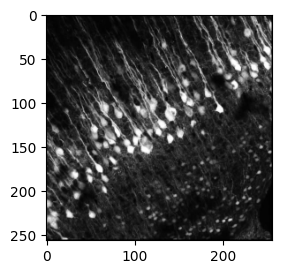

In [98]:
cell_ft_sr = np.fft.ifftshift(cell_ft0)
cell_ft_ifft = np.fft.ifft2(cell_ft_sr)

amplitude = np.abs(cell_ft_ifft)
phase2 = np.angle(cell_ft_ifft)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(amplitude, 'gray')


---


**[Task 2 (a).]()** Load the brain CT image.


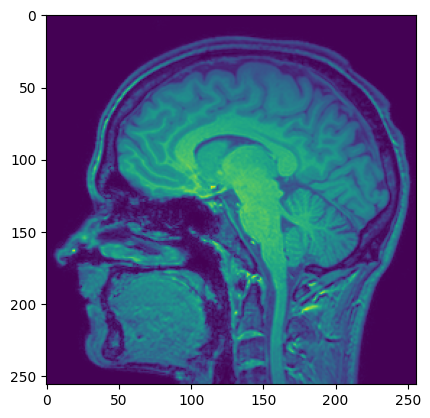

In [99]:
brainct = plt.imread('data/brain_ct.png')
plt.imshow(brainct)


**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [100]:
brainct_ft = np.fft.fft2(brainct)
brain_ftsh = np.fft.fftshift(brainct_ft)


amplitude_br = np.abs(brain_ftsh)
phase_br = np.angle(brain_ftsh)


In [ ]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)


**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


In [109]:
brainct_ft = np.fft.fft2(brainct)
cell_ft = np.fft.fft2(cell_img)

amplitudebrain = np.abs(brainct_ft)
phasecells = np.angle(cell_ft)

merged_2c = to_complex_array(amplitudebrain, phasecells)
merged_2c_ifft = np.fft.ifft2(merged_2c)



**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [104]:
filter_window_size = 50

**[Task 3 (b).]()** Create a highpass filter maks.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [105]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

NameError: name 'brain_img' is not defined

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
